###1. Download the red and white wine .csv files and import them. The first 11 columns are features and the final column is the target.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

red_data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
white_data  = np.loadtxt('winequality-white.csv', delimiter=';', skiprows=1)

w_qualities = white_data[:,11]
r_qualities = red_data[:,11]

###2. Plot bar-plots of the number of examples with each target value for the two datasets.

<Container object of 7 artists>

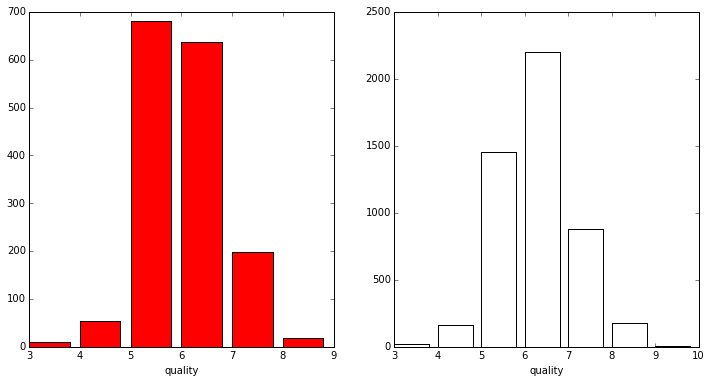

In [2]:
#Obtain quality ranges and counts
w_quality_range, w_counts = np.unique(w_qualities, return_counts=True)
r_quality_range, r_counts = np.unique(r_qualities, return_counts=True)

#Plot qualities for both white and red wine

%matplotlib inline
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('quality')
plt.bar(r_quality_range, r_counts, color='r')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('quality')
plt.bar(w_quality_range, w_counts, color='w')

###3.Comment on these distributions. How might they effect the analysis?

###4. (Linear Regression)

####(a) Randomly Select 30% of red wine data for testing, and 70% for training

In [3]:
# Set for consistancy
np.random.seed(14324)

features = red_data[:,:11]
features = np.hstack((np.ones_like(features[:,:1]), features))
target = red_data[:,11]

#Obtain how many rows we need for training
n_train_rows = np.floor((red_data.shape[0] * 0.7))
#Choose a random set of row numbers to use as training data
train_rows_nums = np.random.choice(red_data.shape[0], n_train_rows, replace=False)
#Extract training data
train_data = red_data[train_rows_nums]
#The rest are test data
test_data = np.delete(red_data, train_rows_nums, axis=0)
test_features = np.delete(features, train_rows_nums, axis=0)
test_target = np.delete(target, train_rows_nums, axis=0)

####(b) Fit a linear regression to the training data

In [4]:
x = train_data[:,:11]
y = train_data[:,11]

#Work out optimal value of w
X = np.hstack((np.ones_like(x[:,:1]), x))
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

####(c) Make a scatter plot the predictions versus the true targets for the test set and compute the
mean squared error on the test set

0.41460173754


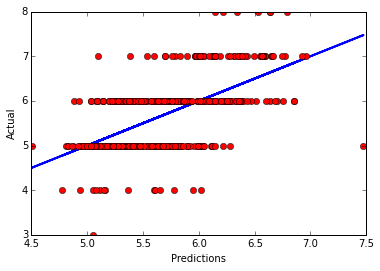

In [5]:
actual = test_target

predictions = np.dot(test_features, w)
plt.plot(predictions, predictions, 'b-', linewidth=2)
plt.plot(predictions, actual, 'ro')
plt.xlabel('Predictions')
plt.ylabel('Actual')

msqErr = ((actual - predictions)**2).mean()
print(msqErr)

####(d) Suggest a benchmark that you could use to decide if this mean squared error value is good.

Mean squared error is a relative measurement, so the only way to decide if it's "good" is to compare it against the MSE of another model. We'll calculate the MSE of the linear regression model with no training (the MSE will clrearly be higher due to fitting for the entire data set), and then calculate the 

####(e) Implement your benchmark

In [6]:
#Work out optimal value of w
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
w = np.linalg.solve(np.dot(features.T, features),
                    np.dot(features.T, target))
actual = target
predictions = np.dot(features, w)
msq = ((actual - predictions)**2).mean()
print(msq)

0.416767167221


####(f) Briefly discuss the linear regression performance with respect to the benchmark.

###5. Regularised linear regression

####(a) Implement regularised least squares and make a plot of the test performance versus the regularisation parameter.

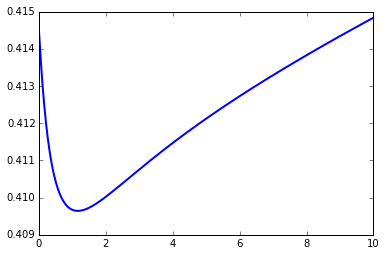

In [12]:
x = train_data[:,:11]
y = train_data[:,11]
X = np.hstack((np.ones_like(x[:,:1]), x))

dims = X.shape[1]
msq_errs = []
lambs = np.linspace(0, 10.0, num=1000)

for lamb in lambs:
    w = np.linalg.solve(np.dot(X.T, X) + lamb*np.identity(dims),
                        np.dot(X.T, y))
    f_test = np.dot(test_features, w)
    msq_err = ((test_target - f_test)**2).mean()
    msq_errs.append(msq_err)
    
plt.figure()
plt.plot(lambs, msq_errs,'b-',linewidth=2)

####(b) Describe why this is not a good way of determining the value of the regularisation parameter.

Minimising on just the test data is overfitting 

####(c) Implement a 10-fold CV on the training data and use this to determine the value of the regularisation parameter. Quote the optimal value, and the performance at this value on the test set.

In [36]:

np.random.permutation(train_data)
n = train_data.shape[0]
inc = np.floor(n/10)
lambs = np.linspace(0, 10.0, num=1001)
optimal_lambda = np.inf
optimal_msq_err = np.inf

for i in np.arange(10):
    r_train_indexes = np.arange(np.floor((n * i) / 10), np.floor((n * (i + 1)) / 10), dtype=int)
    r_train_data =  np.delete(train_data, r_train_indexes, axis=0)
    r_test_data = train_data[r_train_indexes]
    r_test_features = np.hstack((np.ones_like(r_test_data[:,:1]), r_test_data[:,:11]))
    r_test_target = r_test_data[:,11]
    
    x = r_train_data[:,:11]
    y = r_train_data[:,11]
    X = np.hstack((np.ones_like(x[:,:1]), x))
    
    dims = X.shape[1]
    msq_errs = []
    
    for lamb in lambs:
        w = np.linalg.solve(np.dot(X.T, X) + lamb*np.identity(dims),
                            np.dot(X.T, y))
        f_test = np.dot(r_test_features, w)
        msq_err = ((r_test_target - f_test)**2).mean()
        
        #Pick the lambda value which gives the overall lowest
        #Mean Squared Error in all CV sets
        if (msq_err < optimal_msq_err):
            optimal_msq_err = msq_err
            optimal_lambda = lamb
      
    
print("optimal lambda: " + str(optimal_lambda))
    
x = train_data[:,:11]
y = train_data[:,11]
X = np.hstack((np.ones_like(x[:,:1]), x))
    
w = np.linalg.solve(np.dot(X.T, X) + optimal_lambda*np.identity(dims),
                        np.dot(X.T, y))
f_test = np.dot(test_features, w)
msq_err = ((test_target - f_test)**2).mean()  

print("mean squared error: " + str(msq_err))


optimal lambda: 2.86
mean squared error: 0.410648781037


####(d) Compare the performance with the standard linear regression case, discussing possible reasons for any change in performance.

###6. Classification

####(a) Describe one limitation of using regression for this particular task?

(b) Pick either Naive Bayes or KNN. Describe a positive and a negative feature of your
classifier with respect to this class.

(c) Describe any data pre-processing that you suggest for this data and your chosen classifier.

(d) Implement your classifier and optimise its parameters. Make sure your optimisation is
clearly commented. Use classification accuracy as your figure of merit.

(e) Display the confusion matrix on the text data

(f) Discuss the performance. Suggest a way in which the performance could be improved.